In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

In [4]:
# Set the start and end date for fetching stock data
start_date = "2016-01-01"
end_date = datetime.datetime.today().strftime('2025-02-18')

# Get historical data from the stock from January 1, 2016 to end_date
gme = yf.Ticker("GME")
gme_data = gme.history(start=start_date, end=end_date)

In [5]:
display(gme_data)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-01-04 00:00:00-05:00,5.217164,5.491142,5.211376,5.462201,17321600,0.0,0.0
2016-01-05 00:00:00-05:00,5.516225,5.597260,5.413965,5.550954,13666400,0.0,0.0
2016-01-06 00:00:00-05:00,5.446764,5.545165,5.294340,5.473776,15025600,0.0,0.0
2016-01-07 00:00:00-05:00,5.425541,5.550954,5.352223,5.489212,10651200,0.0,0.0
2016-01-08 00:00:00-05:00,5.537447,5.554812,5.410105,5.473776,10796800,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-10 00:00:00-05:00,25.500000,27.270000,25.299999,27.120001,9694700,0.0,0.0
2025-02-11 00:00:00-05:00,26.850000,27.760000,26.469999,26.559999,7042700,0.0,0.0
2025-02-12 00:00:00-05:00,26.120001,26.400000,25.600000,25.990000,3999200,0.0,0.0


<h2/> Data Preprocessing

In [6]:
gme_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2294 entries, 2016-01-04 00:00:00-05:00 to 2025-02-14 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2294 non-null   float64
 1   High          2294 non-null   float64
 2   Low           2294 non-null   float64
 3   Close         2294 non-null   float64
 4   Volume        2294 non-null   int64  
 5   Dividends     2294 non-null   float64
 6   Stock Splits  2294 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 143.4 KB


In [7]:
gme_data[gme_data.isnull().any(axis=1)]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,


In [8]:
gme_data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

<h2/> EDA and Visualization

<h4/> Descriptive Statistics

In [9]:
print("Descriptive Statistics:")
display(gme_data.describe())

Descriptive Statistics:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2294.000000,2294.000000,2294.000000,2294.000000,2.294000e+03,2294.000000,2294.000000
mean,14.561754,15.219363,13.938304,14.520602,1.974632e+07,0.000534,0.001744
std,15.017008,15.959571,14.089494,14.874601,4.480046e+07,0.007076,0.083515
min,0.712500,0.735000,0.642500,0.700000,1.122700e+06,0.000000,0.000000
25%,3.389761,3.474608,3.313206,3.402821,6.170500e+06,0.000000,0.000000
50%,5.565820,5.644946,5.496092,5.564819,1.009120e+07,0.000000,0.000000
75%,23.600000,24.750000,22.817500,23.760001,1.714800e+07,0.000000,0.000000
max,94.927498,120.750000,72.877502,86.877502,7.886316e+08,0.095000,4.000000


In [10]:
sns.set_style("darkgrid")       # Dark background with grid for contrast
sns.set_context("notebook")     # Optimized for Jupyter readability
sns.set_palette("husl")         # Vibrant, distinct colors
plt.rcParams['figure.figsize'] = (14, 6)  # Default figure size

<h4/> Time Series Plot (Open, High, Low, Close)

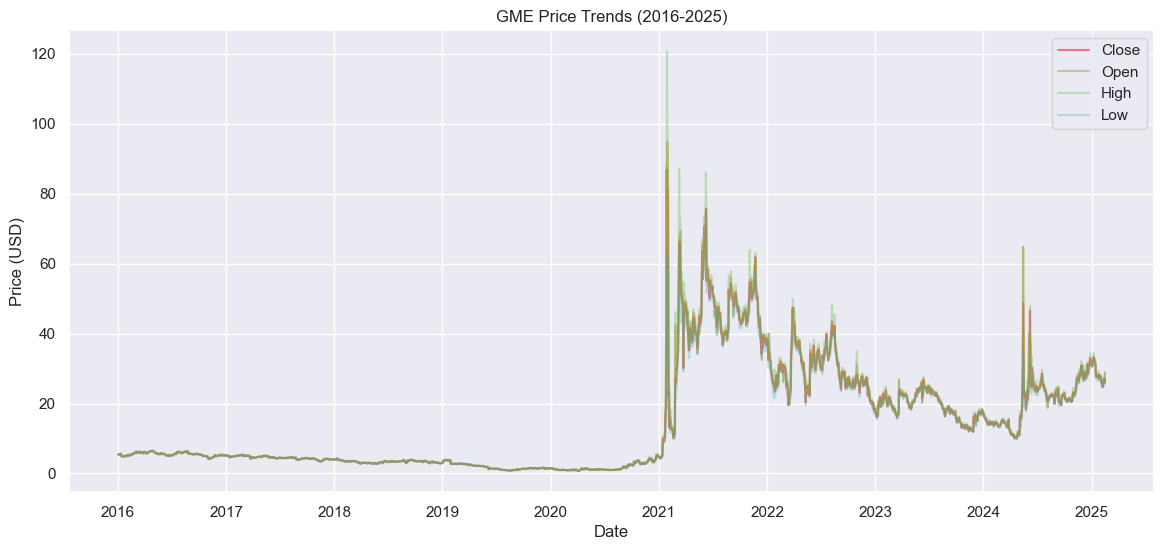

In [13]:
sns.lineplot(data=gme_data, x=gme_data.index, y='Close', label='Close')
sns.lineplot(data=gme_data, x=gme_data.index, y='Open', label='Open', alpha=0.5)
sns.lineplot(data=gme_data, x=gme_data.index, y='High', label='High', alpha=0.3)
sns.lineplot(data=gme_data, x=gme_data.index, y='Low', label='Low', alpha=0.3)
plt.title('GME Price Trends (2016-2025)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

<h4/> Close Price (Last Year Zoom-in)


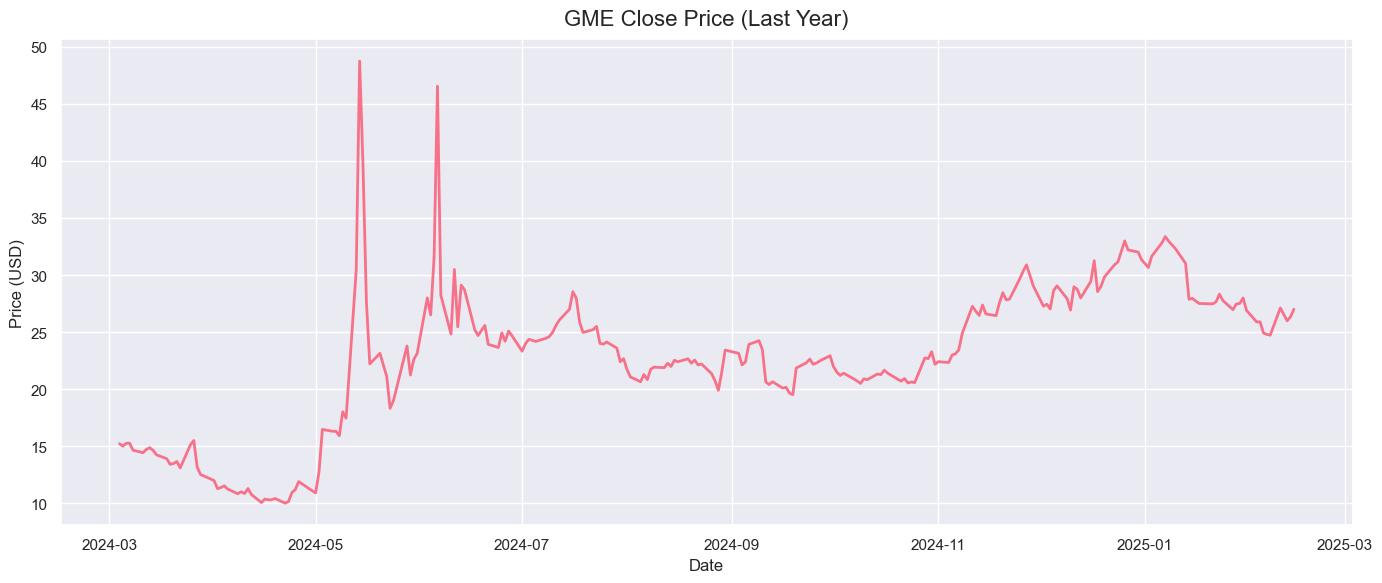

In [15]:
last_year = gme_data[gme_data.index >= '2024-03-04']

plt.figure()
sns.lineplot(data=last_year, x=last_year.index, y='Close', linewidth=2)
plt.title('GME Close Price (Last Year)', fontsize=16, pad=10)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.tight_layout()
plt.show()

<h4/> Close Price Distribution

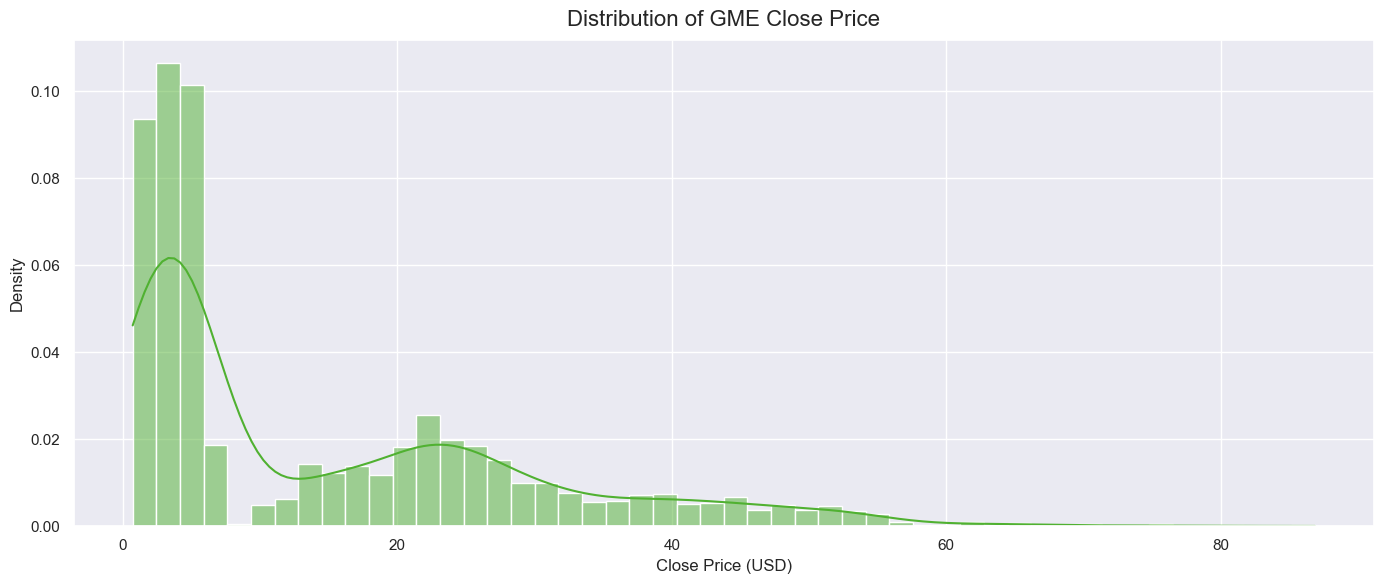

In [17]:
plt.figure()
sns.histplot(data=gme_data, x='Close', bins=50, kde=True, color=sns.color_palette("husl")[2], stat='density')
plt.title('Distribution of GME Close Price', fontsize=16, pad=10)
plt.xlabel('Close Price (USD)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.tight_layout()
plt.show()

<h4/> ADF Test for Stationarity

In [19]:
adf_result = adfuller(gme_data['Close'].dropna())
print("ADF Test for Stationarity (Close):")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print("Stationary" if adf_result[1] < 0.05 else "Non-Stationary")

ADF Test for Stationarity (Close):
ADF Statistic: -1.3977284950958213
p-value: 0.5833646207372618
Non-Stationary


<h4/> Daily Returns Time Series Plot

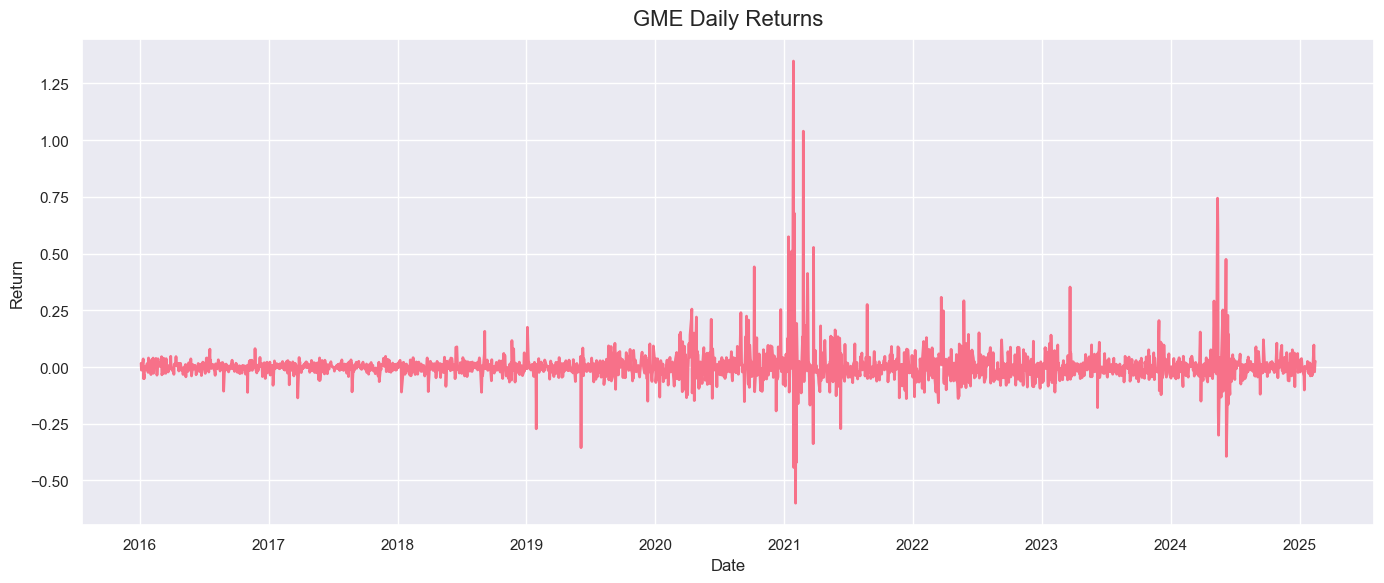

In [20]:
returns = gme_data['Close'].pct_change().dropna()
returns_df = pd.DataFrame({'Returns': returns}, index=returns.index)
plt.figure()
sns.lineplot(data=returns_df, x=returns_df.index, y='Returns', linewidth=2)
plt.title('GME Daily Returns', fontsize=16, pad=10)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Return', fontsize=12)
plt.tight_layout()
plt.show()

<h4/> Correlation Matrix

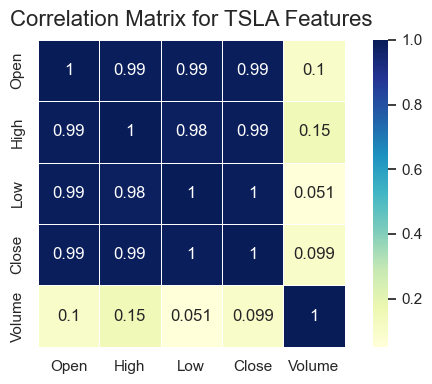

In [21]:
plt.figure(figsize=(6, 4))
sns.heatmap(gme_data[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='YlGnBu', 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix for TSLA Features', fontsize=16, pad=10)
plt.tight_layout()
plt.show()

<h4/> Rolling Mean and Std Dev

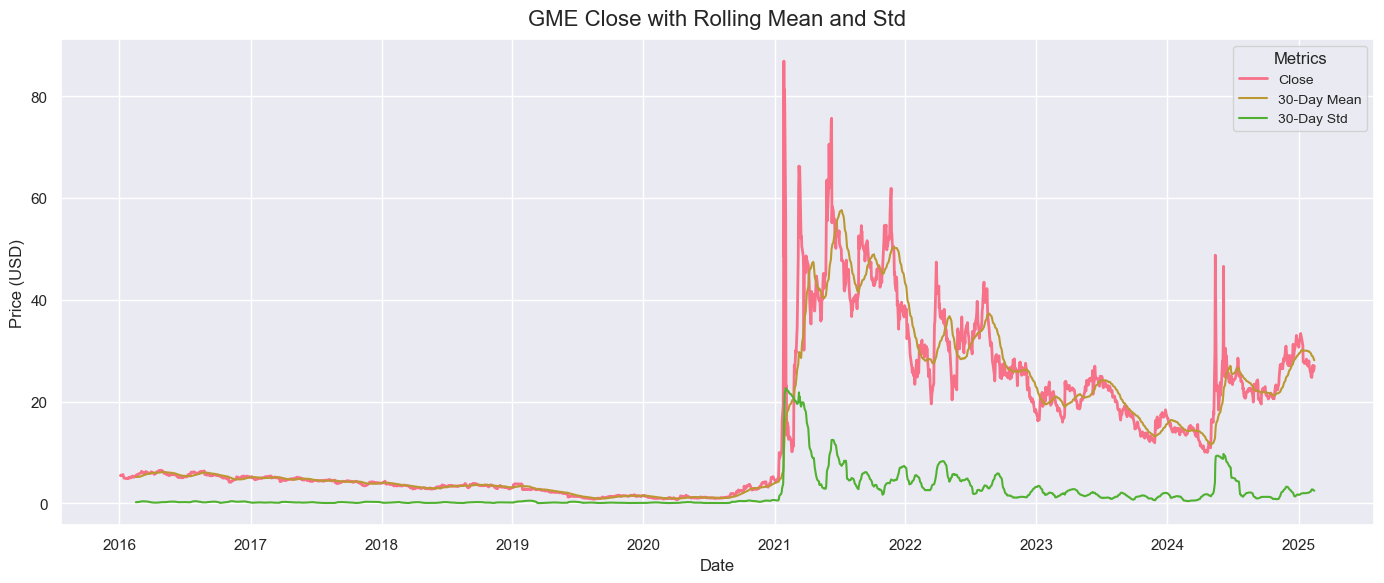

In [23]:
rolling_mean = gme_data['Close'].rolling(window=30).mean()
rolling_std = gme_data['Close'].rolling(window=30).std()
rolling_df = pd.DataFrame({'Close': gme_data['Close'], '30-Day Mean': rolling_mean, '30-Day Std': rolling_std})
plt.figure()
sns.lineplot(data=rolling_df, x=rolling_df.index, y='Close', label='Close', linewidth=2)
sns.lineplot(data=rolling_df, x=rolling_df.index, y='30-Day Mean', label='30-Day Mean', linewidth=1.5)
sns.lineplot(data=rolling_df, x=rolling_df.index, y='30-Day Std', label='30-Day Std', linewidth=1.5)
plt.title('GME Close with Rolling Mean and Std', fontsize=16, pad=10)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend(title='Metrics', fontsize=10)
plt.tight_layout()
plt.show()